In [62]:
!pip install seisbench

In [202]:
#se importan las librerias para la lectura 
#y procesamiento preliminar de los datos

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn= warn

import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
import statsmodels.api as sm 

In [315]:
from sklearn.model_selection import train_test_split
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,KernelPCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from datetime import datetime, timedelta
import numpy as np
from scipy.optimize import minimize
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

In [204]:
Filepath= r"Dataset.csv"
df=pd.read_csv(Filepath)
print(df.head())

                      Time  Latitude  Longitude  Depth/Km  Magnitude
0  2016-08-24 03:36:32.000   42.6983    13.2335       8.1        6.0
1  2016-08-24 03:37:26.580   42.7123    13.2533       9.0        4.5
2  2016-08-24 03:40:46.590   42.7647    13.1723       9.7        3.8
3  2016-08-24 03:41:38.900   42.7803    13.1683       9.7        3.9
4  2016-08-24 03:42:07.170   42.7798    13.1575       9.7        3.6


In [205]:
#Dft=df
#Dft.index=pd.to_datetime(Dft['Time'])

In [206]:
#Dft.head()

In [207]:
#Dft["Magnitude"].resample("1D").apply([np.mean]).plot(label='Magnitud promedio')
#plt.title("Magnitud cada Dos días")
#plt.ylabel("Magnitud")
#plt.xlabel("Fecha")
#plt.savefig("SerieTiempo.png")

In [208]:
df['Time']=pd.to_datetime(df['Time'])
VentanaTiempo= '1W'
Dfagrup = df.groupby(pd.Grouper(key='Time', freq=VentanaTiempo))
IndiceVentana=0


In [209]:
Dfagrup.head()

,Time,Latitude,Longitude,Depth/Km,Magnitude
0,2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
1,2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2,2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
3,2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
4,2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6
...,...,...,...,...,...
7864,2016-11-28 00:11:38.600,43.0222,13.0900,9.7,2.4
7865,2016-11-28 00:34:14.920,43.0207,13.0752,7.7,2.0
7866,2016-11-28 00:34:37.510,42.9998,13.0772,9.8,2.2
7867,2016-11-28 00:46:13.760,43.0178,13.0732,9.5,2.4


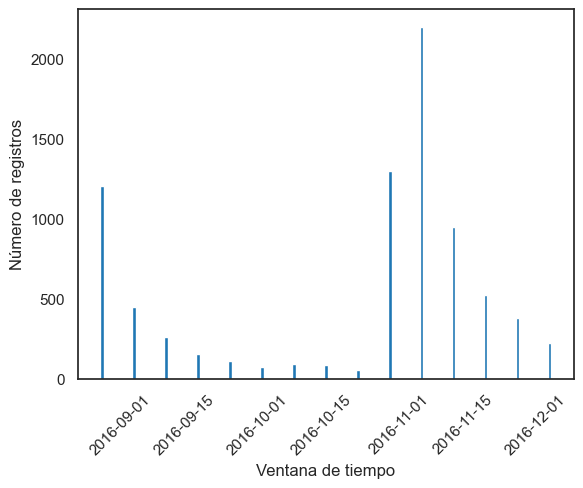

In [210]:
# Obtener el conteo de registros por grupo
group_counts = Dfagrup.size()

# Visualizar el conteo de registros en un gráfico de barras
plt.bar(group_counts.index, group_counts.values)
plt.xlabel('Ventana de tiempo')
plt.ylabel('Número de registros')
plt.xticks(rotation=45)
plt.show()

Time
2016-08-28    AxesSubplot(0.125,0.11;0.775x0.77)
2016-09-04    AxesSubplot(0.125,0.11;0.775x0.77)
2016-09-11    AxesSubplot(0.125,0.11;0.775x0.77)
2016-09-18    AxesSubplot(0.125,0.11;0.775x0.77)
2016-09-25    AxesSubplot(0.125,0.11;0.775x0.77)
2016-10-02    AxesSubplot(0.125,0.11;0.775x0.77)
2016-10-09    AxesSubplot(0.125,0.11;0.775x0.77)
2016-10-16    AxesSubplot(0.125,0.11;0.775x0.77)
2016-10-23    AxesSubplot(0.125,0.11;0.775x0.77)
2016-10-30    AxesSubplot(0.125,0.11;0.775x0.77)
2016-11-06    AxesSubplot(0.125,0.11;0.775x0.77)
2016-11-13    AxesSubplot(0.125,0.11;0.775x0.77)
2016-11-20    AxesSubplot(0.125,0.11;0.775x0.77)
2016-11-27    AxesSubplot(0.125,0.11;0.775x0.77)
2016-12-04    AxesSubplot(0.125,0.11;0.775x0.77)
Freq: W-SUN, Name: Magnitude, dtype: object

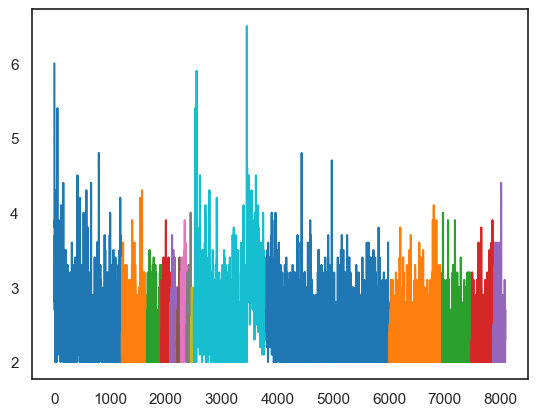

In [211]:
Dfagrup['Magnitude'].plot()

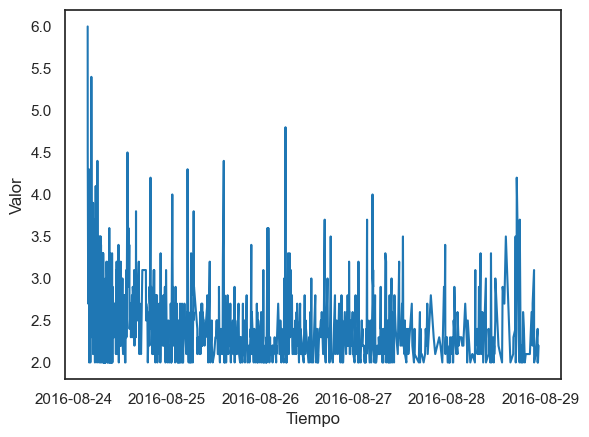

In [212]:
window_size = '1W'
grouped = df.groupby(pd.Grouper(key='Time', freq=window_size))

# Seleccionar una ventana específica (por ejemplo, la primera ventana)
window_index = 0
window_data = grouped.get_group(list(grouped.groups.keys())[window_index])

# Desplegar la serie de tiempo de la ventana seleccionada
plt.plot(window_data['Time'], window_data['Magnitude'])
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.show()

## Agrupación sobre datos en crudo

In [213]:
grouped.head()

,Time,Latitude,Longitude,Depth/Km,Magnitude
0,2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
1,2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2,2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
3,2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
4,2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6
...,...,...,...,...,...
7864,2016-11-28 00:11:38.600,43.0222,13.0900,9.7,2.4
7865,2016-11-28 00:34:14.920,43.0207,13.0752,7.7,2.0
7866,2016-11-28 00:34:37.510,42.9998,13.0772,9.8,2.2
7867,2016-11-28 00:46:13.760,43.0178,13.0732,9.5,2.4


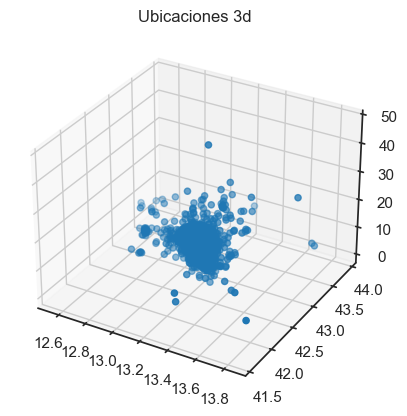

In [214]:
distri= plt.axes(projection="3d")
distri.scatter3D(df['Longitude'],df['Latitude'],df['Depth/Km'])
distri.set_title('Ubicaciones 3d')
plt.show()

In [215]:
XN=df.iloc[:,[1,2,3,4]]

In [216]:
XN.head()

,Latitude,Longitude,Depth/Km,Magnitude
0,42.6983,13.2335,8.1,6.0
1,42.7123,13.2533,9.0,4.5
2,42.7647,13.1723,9.7,3.8
3,42.7803,13.1683,9.7,3.9
4,42.7798,13.1575,9.7,3.6


In [217]:
Scaler=StandardScaler().fit(XN)
XN_es=Scaler.transform(XN)

In [218]:
XN_es
#df['Time']=pd.to_datetime(df['Time'])

array([[-1.04238786,  0.87253243, -0.85159024,  8.44750587],
       [-0.93120583,  1.11093433, -0.44136718,  4.92930712],
       [-0.5150674 ,  0.13565382, -0.1223048 ,  3.28748103],
       ...,
       [ 1.42664725, -0.38810794, -0.89717058, -0.46526431],
       [ 1.51003377, -0.71440549, -0.30462616,  0.70746861],
       [ 1.30196455, -1.0322747 , -0.21346548, -0.23071773]])

In [219]:
arraytime=np.array(df['Time'], dtype='datetime64')
print(arraytime)

['2016-08-24T03:36:32.000000000' '2016-08-24T03:37:26.580000000'
 '2016-08-24T03:40:46.590000000' ... '2016-11-30T20:18:27.550000000'
 '2016-11-30T20:45:11.780000000' '2016-11-30T20:54:35.890000000']


In [220]:
#TimeXN_es=np.column_stack((XN_es))

In [221]:
#TimeXN_es[:,4]

In [222]:
inertia=[]
numCluster=list(range(1,11))
for k in numCluster:
    km=KMeans(n_clusters=k)
    km.fit(XN_es)
    inertia.append(km.inertia_)

Text(0, 0.5, 'Inercia')

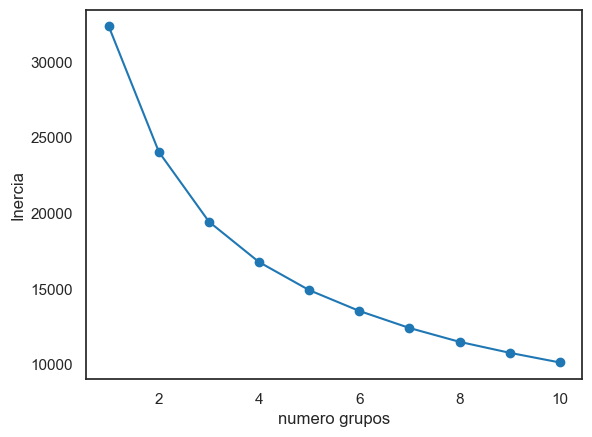

In [223]:
y=np.linspace(1,10)
plt.scatter(numCluster,inertia)
plt.plot(numCluster,inertia)
plt.xlabel('numero grupos')
plt.ylabel('Inercia')

In [224]:
kmd=KMeans(n_clusters=3)
kmd.fit(XN_es)

KMeans(n_clusters=3)

In [225]:
XN_es

array([[-1.04238786,  0.87253243, -0.85159024,  8.44750587],
       [-0.93120583,  1.11093433, -0.44136718,  4.92930712],
       [-0.5150674 ,  0.13565382, -0.1223048 ,  3.28748103],
       ...,
       [ 1.42664725, -0.38810794, -0.89717058, -0.46526431],
       [ 1.51003377, -0.71440549, -0.30462616,  0.70746861],
       [ 1.30196455, -1.0322747 , -0.21346548, -0.23071773]])

In [226]:
labels=kmd.labels_

In [227]:
XN_esla= np.column_stack((XN_es, labels))

In [228]:
etiquetas=set(labels)
neti=len(etiquetas)

In [229]:
print(etiquetas)

{0, 1, 2}


In [230]:
XN_esla
nombreCol= ['LatitudNorm','LongitudNorm','DeptNorm','MagnitudNorm','Label']
dfNL=pd.DataFrame(XN_esla, columns=nombreCol)
dfNL['Time']=pd.to_datetime(arraytime)

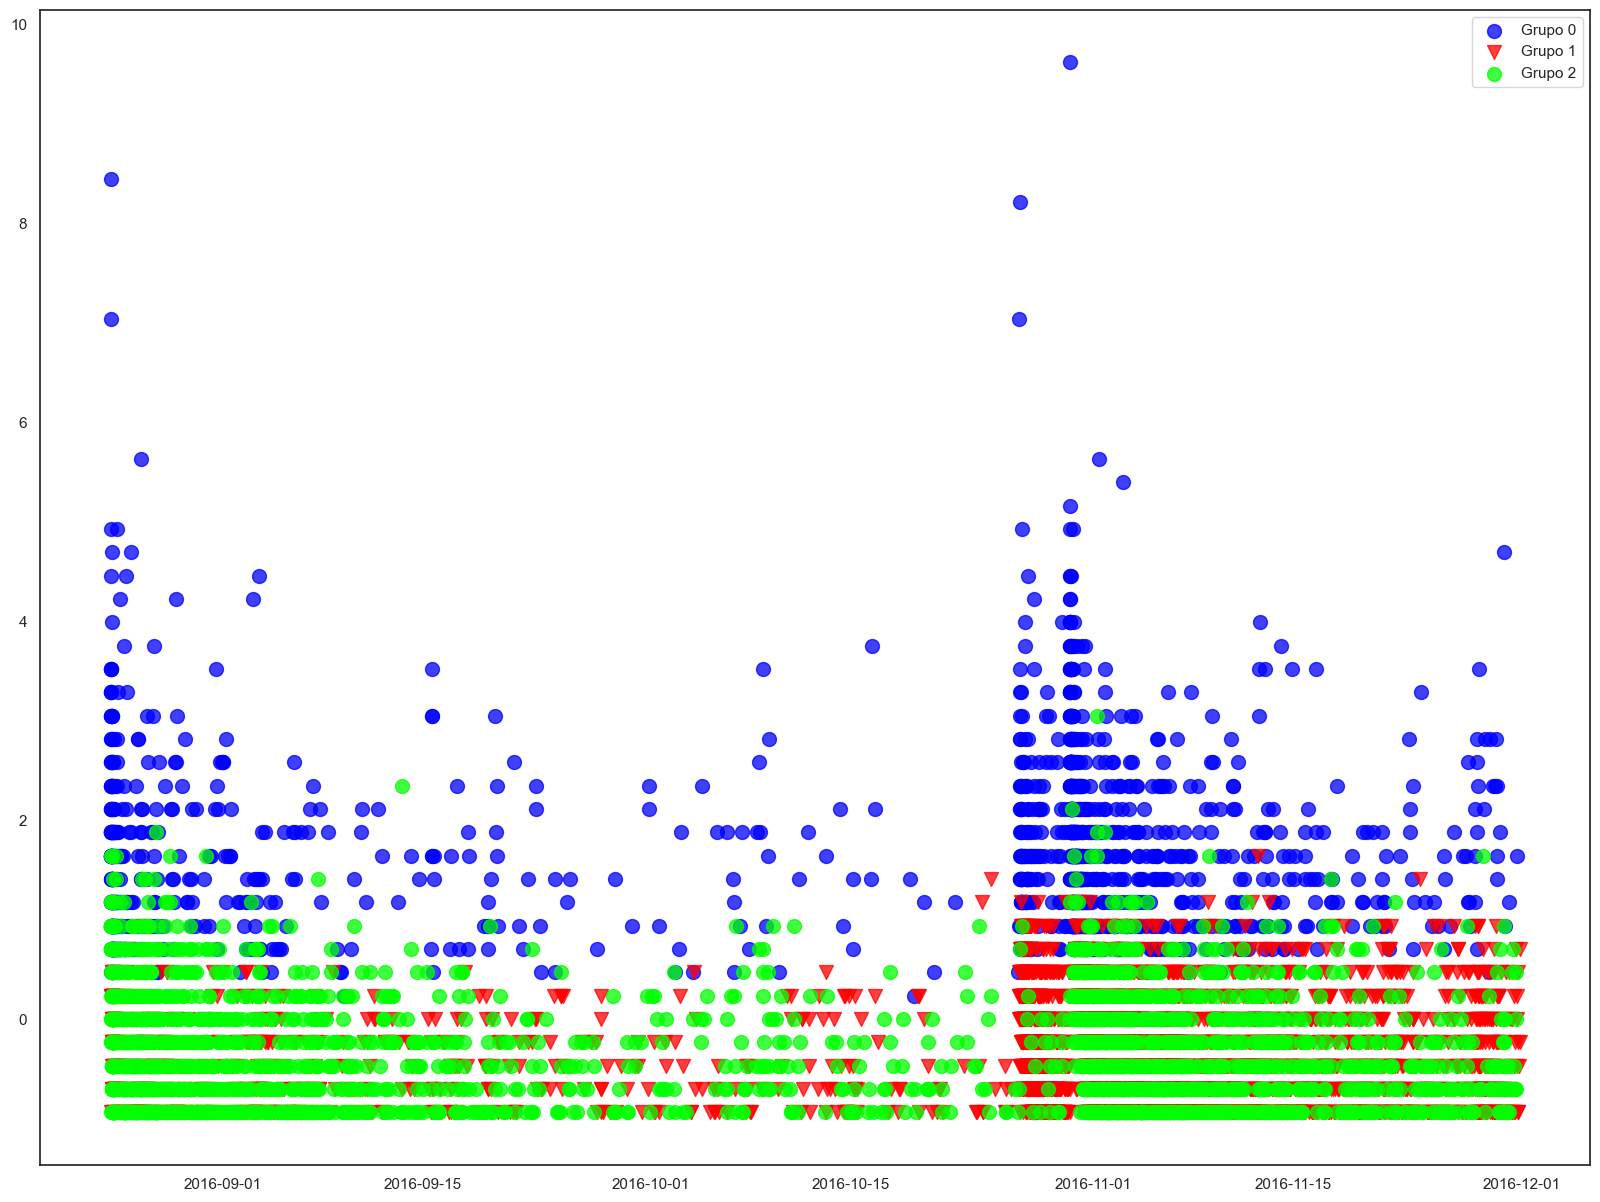

In [231]:
cmap=plt.cm.get_cmap('brg',neti)
# formato de la figura
plt.rcParams['figure.figsize'] = (20,15)
for l in etiquetas:
            plt.scatter(
                #df['Time'][kmd.labels_==l],
                #df['Magnitude'][kmd.labels_==l],
                dfNL['Time'][kmd.labels_==l],
                dfNL['MagnitudNorm'][kmd.labels_==l],
                # los colores se eligen por iteracion del mapa de calor como el valor -1 no se toma en cmap se 
                # clasifica directamente como negro
                c=[cmap(l)],
                marker='ov'[l%2],
                alpha=0.75,
                s=100,
                # se imprimen los clusters y -1 se clasifica diretametne como ruido
                label=f'Grupo {l}')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [232]:
dfNL

,LatitudNorm,LongitudNorm,DeptNorm,MagnitudNorm,Label,Time
0,-1.042388,0.872532,-0.851590,8.447506,0.0,2016-08-24 03:36:32.000
1,-0.931206,1.110934,-0.441367,4.929307,0.0,2016-08-24 03:37:26.580
2,-0.515067,0.135654,-0.122305,3.287481,0.0,2016-08-24 03:40:46.590
3,-0.391179,0.087492,-0.122305,3.522028,0.0,2016-08-24 03:41:38.900
4,-0.395150,-0.042546,-0.122305,2.818388,0.0,2016-08-24 03:42:07.170
...,...,...,...,...,...,...
8081,0.482394,-1.701727,0.333499,-0.934357,1.0,2016-11-30 18:39:27.600
8082,0.911239,0.472788,-0.623689,0.472922,1.0,2016-11-30 18:43:14.850
8083,1.426647,-0.388108,-0.897171,-0.465264,1.0,2016-11-30 20:18:27.550
8084,1.510034,-0.714405,-0.304626,0.707469,1.0,2016-11-30 20:45:11.780


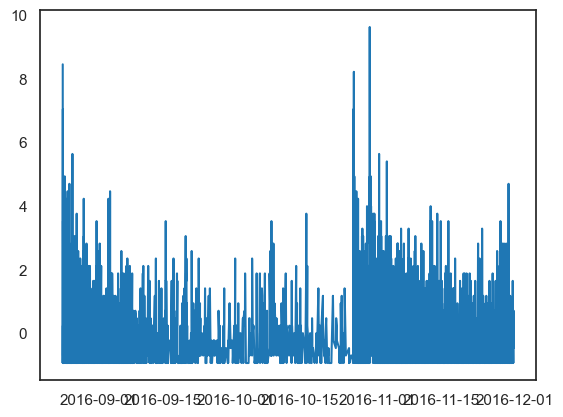

In [233]:
plt.plot(dfNL['Time'],dfNL['MagnitudNorm'])

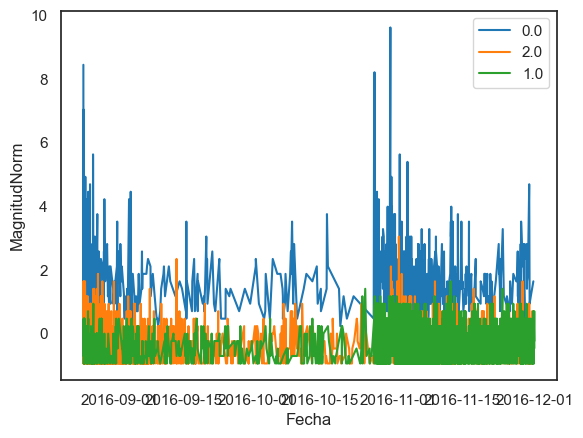

In [234]:
fig, ax = plt.subplots()

for label in dfNL['Label'].unique():
    subset=dfNL[dfNL['Label']==label]
    ax.plot(subset['Time'], subset['MagnitudNorm'], label=label)
ax.legend()
plt.xlabel('Fecha')
plt.ylabel('MagnitudNorm')
plt.show()

In [235]:
df.describe()

,Latitude,Longitude,Depth/Km,Magnitude
count,8086.000000,8086.000000,8086.000000,8086.000000
mean,42.829557,13.161034,9.968328,2.398368
std,0.125927,0.083058,2.194064,0.426381
min,41.581300,12.537700,0.200000,2.000000
25%,42.751350,13.103200,8.900000,2.100000
50%,42.821800,13.160700,9.900000,2.300000
75%,42.911000,13.215650,10.800000,2.600000
max,43.927300,13.852500,47.900000,6.500000


In [236]:
ng=grouped.groups

In [237]:
#import seisbench
#import seisbench.data as sbd
#import os
#print("Cache root:", seisbench.cache_root)
#print("Contents:", os.listdir(seisbench.cache_root))
#print("datasets:", os.listdir(seisbench.cache_root / "datasets"))
#print("dummydataset:", os.listdir(seisbench.cache_root / "datasets" / "dummydataset"))
#Ruta= r"metadata.csv"
#datos=pd.read_csv(Ruta)
#print(datos.head())
#datos['source_origin_time']=pd.to_datetime(datos['source_origin_time'])
#datos['source_origin_time'].unique()

In [238]:
print(len(ng))

15


In [239]:
print(ng)

{Timestamp('2016-08-28 00:00:00', freq='W-SUN'): 1210, Timestamp('2016-09-04 00:00:00', freq='W-SUN'): 1662, Timestamp('2016-09-11 00:00:00', freq='W-SUN'): 1922, Timestamp('2016-09-18 00:00:00', freq='W-SUN'): 2081, Timestamp('2016-09-25 00:00:00', freq='W-SUN'): 2196, Timestamp('2016-10-02 00:00:00', freq='W-SUN'): 2269, Timestamp('2016-10-09 00:00:00', freq='W-SUN'): 2362, Timestamp('2016-10-16 00:00:00', freq='W-SUN'): 2449, Timestamp('2016-10-23 00:00:00', freq='W-SUN'): 2502, Timestamp('2016-10-30 00:00:00', freq='W-SUN'): 3804, Timestamp('2016-11-06 00:00:00', freq='W-SUN'): 6006, Timestamp('2016-11-13 00:00:00', freq='W-SUN'): 6955, Timestamp('2016-11-20 00:00:00', freq='W-SUN'): 7481, Timestamp('2016-11-27 00:00:00', freq='W-SUN'): 7864, Timestamp('2016-12-04 00:00:00', freq='W-SUN'): 8086}


In [470]:
dfD=df[df['Magnitude'] > 3.0 ]
dfD.reset_index(drop=True, inplace=True)

In [471]:
dfD
window_size = '1W'
groupedD = dfD.groupby(pd.Grouper(key='Time', freq=window_size))

# Seleccionar una ventana específica (por ejemplo, la primera ventana)
window_index = 0
window_dataD = groupedD.get_group(list(groupedD.groups.keys())[window_index])

In [472]:
ngD=groupedD.groups.keys()
print(ngD)

dict_keys([Timestamp('2016-08-28 00:00:00', freq='W-SUN'), Timestamp('2016-09-04 00:00:00', freq='W-SUN'), Timestamp('2016-09-11 00:00:00', freq='W-SUN'), Timestamp('2016-09-18 00:00:00', freq='W-SUN'), Timestamp('2016-09-25 00:00:00', freq='W-SUN'), Timestamp('2016-10-02 00:00:00', freq='W-SUN'), Timestamp('2016-10-09 00:00:00', freq='W-SUN'), Timestamp('2016-10-16 00:00:00', freq='W-SUN'), Timestamp('2016-10-23 00:00:00', freq='W-SUN'), Timestamp('2016-10-30 00:00:00', freq='W-SUN'), Timestamp('2016-11-06 00:00:00', freq='W-SUN'), Timestamp('2016-11-13 00:00:00', freq='W-SUN'), Timestamp('2016-11-20 00:00:00', freq='W-SUN'), Timestamp('2016-11-27 00:00:00', freq='W-SUN'), Timestamp('2016-12-04 00:00:00', freq='W-SUN')])


In [511]:
Wind0='2016-08-28 00:00:00'
Wind1='2016-09-04 00:00:00'
Wind2='2016-09-11 00:00:00'
Wind3='2016-09-18 00:00:00'
Wind4='2016-09-25 00:00:00'
Wind5='2016-10-02 00:00:00'
Wind6='2016-10-09 00:00:00'
Wind7='2016-10-16 00:00:00'
Wind8='2016-10-23 00:00:00'
Wind9='2016-10-30 00:00:00'
Wind10='2016-11-06 00:00:00'
Wind11='2016-11-13 00:00:00'
Wind12='2016-11-20 00:00:00'
Wind13='2016-11-27 00:00:00'
Wind14='2016-12-04 00:00:00'

In [512]:
Ventana1= groupedD.get_group(Wind0).to_numpy()
Ventana2= groupedD.get_group(Wind1).to_numpy()
Ventana3= groupedD.get_group(Wind2).to_numpy()
Ventana4= groupedD.get_group(Wind3).to_numpy()
Ventana5= groupedD.get_group(Wind4).to_numpy()
Ventana6= groupedD.get_group(Wind5).to_numpy()
Ventana7= groupedD.get_group(Wind6).to_numpy()
Ventana8= groupedD.get_group(Wind7).to_numpy()
#Ventana9= groupedD.get_group(Wind8)
Ventana10= groupedD.get_group(Wind9).to_numpy()
Ventana11= groupedD.get_group(Wind10).to_numpy()
Ventana12= groupedD.get_group(Wind11).to_numpy()
Ventana13= groupedD.get_group(Wind12).to_numpy()
Ventana14= groupedD.get_group(Wind13).to_numpy()
Ventana15= groupedD.get_group(Wind14).to_numpy()

In [568]:
Columnas=['Time','Latitude','Longitude','Depth','Magnitude']
dfV1=pd.DataFrame(Ventana1, columns=Columnas)
dfV2=pd.DataFrame(Ventana2, columns=Columnas)
dfV3=pd.DataFrame(Ventana3, columns=Columnas)
dfV4=pd.DataFrame(Ventana4, columns=Columnas)
dfV5=pd.DataFrame(Ventana5, columns=Columnas)
dfV6=pd.DataFrame(Ventana6, columns=Columnas)
dfV7=pd.DataFrame(Ventana7, columns=Columnas)
dfV8=pd.DataFrame(Ventana8, columns=Columnas)
dfV10=pd.DataFrame(Ventana10, columns=Columnas)
dfV11=pd.DataFrame(Ventana11, columns=Columnas)
dfV12=pd.DataFrame(Ventana12, columns=Columnas)
dfV13=pd.DataFrame(Ventana13, columns=Columnas)
dfV14=pd.DataFrame(Ventana14, columns=Columnas)
dfV15=pd.DataFrame(Ventana15, columns=Columnas)

def VECTS(df):
    X = df['Latitude'].values.astype(float)
    Y = df['Longitude'].values.astype(float)
    DT=df['Time'].iloc[len(df)-1]-df['Time'].iloc[0]
    Mc=3.0
    Mm=max(df['Magnitude'])
    #Xm = np.zeros(len(df))
    #Ym = np.zeros(len(df))
    #Mm = np.zeros(len(df))
    for i in df.index:
        M[i]=df['Magnitude'].iloc[i]-Mc
    return X,Y,M,DT
# Separar los 15 vectores de actividad sísmica 
# Calcular Log-likelihood para cada vector de la semana

In [572]:
def ETAS(X,Y,M,DT,mu,K,c,al,p,d,q): #,mu,K,c,al,p,d,q
    Xi=np.min(X)
    Xs=np.max(X)
    Yi=np.min(Y)
    Ys=np.max(Y)
    N= X.size
    DTD= DT.total_seconds() / (60*60*24)
    T=np.linspace(1, int(DTD) ,num=len(df))
    Ts=int(DTD)
    Mc=3.0
    DTD= DT.total_seconds() / (60*60*24)
    V = np.zeros((N-1,))
    S = np.identity(2)
    Ti = 0
    XY=np.column_stack((X,Y))
    SpacialR=np.zeros(len(df))
    XYSXY=np.zeros(len(df))
    Eal=np.zeros((N-1,))
    for u in range(1,N):
        V[u-1]= np.power(K*((T[N]-T[u])+c),-p)
    for e in range(0,N):
        Eal[e-1]=np.exp(al*(M[e-1]))
        XYSXY[e-1]=np.dot(XY[e],np.transpose(XY[e]))
    for h in range(X.size):
        SpacialR[h-1]=np.pow((XYSXY[h]/Eal[h])+d,-q)
        ET[h-1]=V[h]*SpacialR[h]
    ETAS=mu + np.sum(ET)
    #LNETAS= np.log(ETAS)
    ETAS1= integrate.tplquad((k/np.pow((t+c),p))*(np.pow((((x**2+y**2)/np.exp(al*(Mm-Mc)))+d),-q)),0,Ts,Xi,Xf,Yi,Yf)
    return ETAS,ETAS1

def LoglikeEtas(df,X,Y,M,P,DT):
    V = np.zeros(len(df))
    S = np.identity(2)
    mu=P[0]
    k=P[1]
    c=P[2]
    al=P[3]
    p=P[4]
    d=P[5]
    q=P[6]
    LD=np.array(len(df))
    ETHAS, IETHAS=ETAS(X,Y,M,DT,mu,k,c,al,p,d,q)
    LNETAS= np.sum(np.log(ETHAS))-IETHAS
    return -LNETAS

def constraint1(P):
    return P[1]

def constraint2(P):
    return P[2]

In [573]:
cons = (({'type':'ineq','fun': constraint1},
         {'type':'ineq','fun': constraint2}))

In [574]:
P=[1,1,1,1,1,1,1]
X,Y,M,DT=VECTS(dfV1)
minimize(LoglikeEtas, P, args=(dfV1,X,Y,M,DT),constraints=cons)

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'Timestamp'

In [529]:
#print(max(Ventana1['Magnitude']))